<a href="https://colab.research.google.com/github/antaradas94/MAML-waste-classification/blob/main/dataflower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/bulentsiyah/plant-disease-using-siamese-network-keras?
#https://www.kaggle.com/arpandhatt/siamese-neural-networks
#https://www.kaggle.com/valerasarapas/keras-siamese-network-on-mnist
#https://medium.com/@franky07724_57962/using-keras-pre-trained-models-for-feature-extraction-in-image-clustering-a142c6cdf5b1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/102flowers/'

/content/drive/My Drive/102flowers


In [ ]:
import re
import numpy as np
from PIL import Image

from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras import optimizers

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D,Activation, Dropout
from keras import callbacks
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
import os
from keras.models import Model,load_model
import json
from keras.models import model_from_json, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from __future__ import absolute_import
from __future__ import print_function

import random
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import backend as K
from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D,Activation, Dropout
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import Adam
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from tensorflow.python.keras.metrics import Metric




In [ ]:
num_classes = 102
epochs = 100

In [ ]:
#load images as np arrays
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [ ]:


#all images are loaded as np arrays
images=[]
labels=[]
total=1080
j=1
for i in range(1, total): 
    fname="/content/drive/My Drive/102flowers/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(5) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%40==0: j+=1



# Feature visualize


In [ ]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1079,1) # labels are also converted to (1360,1)
images.shape

(1079, 224, 224, 3)

In [ ]:
images = images[:800]
images.shape
labels = labels[:800]

NameError: ignored

In [ ]:
#takes some time
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(images.reshape((len(images),224*224*3)))

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *


import time
import tensorflow as tf
#tf.set_random_seed(1)

import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

Keras 2.4.3 TF 2.3.0 Python sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


In [ ]:
#### doing the t-sne plot
#### your code here:
#########################
plt.figure(figsize=(5,5))
cmap = cm.get_cmap('jet', 100)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=labels.reshape(len(images)),s=20,cmap=cmap)
plt.title("t-SNE on VGG flower data")
#plt.colorbar()
#plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.grid(color='r', linestyle='-', linewidth=2)
plt.savefig('tsneonVgg.svg',bbox_inches= 'tight', pad_inches  = 0)
plt.show()

NameError: ignored




# TL with clustering

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
#model.summary()


img_path = '/content/drive/My Drive/17flowers/jpg/image_0001.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print(vgg16_feature.shape)

(1, 7, 7, 512)


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

vgg16_weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
model = VGG16(weights='imagenet', input_shape=(224, 224, 3))

553467904/553467096 [==============================] - 4s 0us/step


# resnet50 dataflower

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

#get resnet mödel
model_use_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224,3)) 

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf

#upscale cifar images because resnet is trained on imagenet

# Freeze all the layers except for the last layer: 
for layer in model_use_resnet.layers[:-4]:
    layer.trainable = False
  
 
model = models.Sequential()
model.add(model_use_resnet)
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))
#model.summary()
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['acc'])


In [ ]:
train_dir = '/content/drive/My Drive/17flowers/train'
validation_dir= '/content/drive/My Drive/17flowers/test'
# image augmentation for train set and image resizing for validation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( # this function will generate augmented images in real time
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255) # for validation we don't need to augment

train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory( # this function takes images from folders and feeds to Imagedatagenerator
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1146 images belonging to 17 classes.
Found 287 images belonging to 17 classes.


In [ ]:
er = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, min_delta=0.0001)


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=0, callbacks=[er,lr])

In [ ]:
print('training acc.:',history.history['acc'][-1],'\n','test acc.:', (history.history['val_acc'])[-1])

training acc.: 0.24171029031276703 
 test acc.: 0.1393728256225586


In [ ]:
from keras.preprocessing import image

resnet_feature_list = []
images=[]
labels=[]
total=200

j=1
for i in range(1, total): 
    fname="/content/drive/My Drive/17flowers/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    #images.append(load_data(fpath))
    img = image.load_img(fpath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    labels.append(j) #labels are created as well
    if i%80==0: j+=1
    
    resnet_feature = model_use_resnet.predict(img_data)
    resnet_feature_np = np.array(resnet_feature)
    resnet_feature_list.append(resnet_feature_np.flatten())

        

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(resnet_feature_list, labels)

print(X_train[0:4])


[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.51918864], dtype=float32), array([1.4898303, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.07858321, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:

pca = PCA()
pca.fit(X_train)
pca.explained_variance_.shape
## Applying PCA with k calcuated above

X_train = np.asarray(X_train)
pca = PCA(n_components=10, whiten=True, svd_solver='randomized')

x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.svm import SVC
## Training
svm = SVC(kernel='linear', C=50,gamma=0.01)

svm.fit(X_train,y_train)

print('fitting done !!!')
#svc = svm.SVC()
#svc.fit(x_train_pca, y_test)

fitting done !!!


In [ ]:
svm.score(X_train,y_train)


1.0

In [ ]:
svm.score(X_test,y_test)


0.88

In [ ]:
vgg16_feature_list = []
images=[]
labels=[]
total=200

j=1
for i in range(1, total): 
    fname="/content/drive/My Drive/17flowers/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    #images.append(load_data(fpath))
    img = image.load_img(fpath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    labels.append(j) #labels are created as well
    if i%80==0: j+=1
    
    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())

        

In [ ]:
vgg16_feature_list_train = vgg16_feature_list[0:150]
vgg16_feature_list_test =vgg16_feature_list[149:200]
print(len(vgg16_feature_list_train))
print(len(vgg16_feature_list_test))

150
50


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vgg16_feature_list, labels)

print(X_train[0:4])


[array([0.      , 0.      , 0.      , ..., 0.      , 6.770361, 0.      ],
      dtype=float32), array([ 0.      ,  0.      , 45.07965 , ...,  0.      , 14.565307,
        0.      ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:

pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_.shape

(149,)

In [ ]:
# Calculating optimal k

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.98):
    current_sum += pca.explained_variance_[k]
    k += 1
k

131

In [ ]:
## Applying PCA with k calcuated above

X_train = np.asarray(X_train)
pca = PCA(n_components=k, whiten=True, svd_solver='randomized')

x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [ ]:
x_train_pca

In [ ]:
from sklearn.svm import SVC
## Training
svm = SVC(kernel='linear')

svm.fit(X_train,y_train)

print('fitting done !!!')
#svc = svm.SVC()
#svc.fit(x_train_pca, y_test)

fitting done !!!


In [ ]:
svm.score(X_train,y_train)


1.0

In [ ]:
svm.score(X_test,y_test)

0.82

In [ ]:
Pred_labels = svm.predict(x_test_pca)
Pred_labels


array([1, 2, 3, 3, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       1, 3, 3, 1, 1, 2])

In [ ]:
from sklearn.cluster import KMeans
vgg16_feature_list_np = np.array(vgg16_feature_list)


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(vgg16_feature_list_np)
y_kmeans = kmeans.predict(vgg16_feature_list_np)


In [ ]:
print(kmeans.labels_[:])
#print(y_train[:])
from sklearn import metrics

#score = metrics.accuracy_score(vgg16_feature,kmeans.predict(vgg16_feature_list_np))
#print('Accuracy:{0:f}'.format(score))

[1 1 1 ... 2 1 2]


In [ ]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
#labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
labels = np.asarray(labels).reshape(1,1) # labels are also converted to (999,1)
#n-1 because start from 0...49

images.shape

(1, 224, 224, 3)

In [ ]:
def plot_data_(data):
  for i in range(1):
    plt.figure(figsize=(3,3))
    plt.subplot(210 + 1 + i)
    plt.axis('off')
    plt.imshow(data[i])
  #plt.tight_layout()
  #plt.savefig('dataset_desc_MNIST.svg',bbox_inches= 'tight', pad_inches  = 0)
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


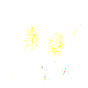

In [ ]:
plot_data_(images)

In [ ]:
# import imageio to open images
import imageio
import imgaug as ia
# import augmenters from imgaug
from imgaug import augmenters as iaa

(500, 665, 3)


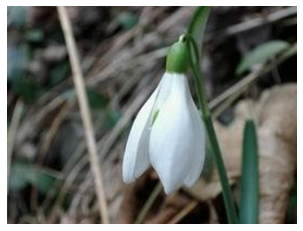

In [ ]:
image = imageio.imread('/content/drive/My Drive/17flowers/jpg/image_0100.jpg') #22
#image = imageio.imread('/content/drive/My Drive/17flowers/images_background/Armenian/character01/0027_02.png') #22

#plt.figure(figsize= (3,2))
plt.axis('off')
plt.imshow(image)
#plt.savefig('dataset_desc_flowpow.svg',bbox_inches= 'tight', pad_inches  = 0)
print(image.shape)

In [ ]:
rotate = iaa.Affine(rotate=(-25, 25)) # rotate image

In [ ]:
image_rotated = rotate.augment_images([image])[0]

In [ ]:
#https://github.com/Lexie88rus/augmentation-packages-overview/blob/master/data-augmentation-packages-overview.ipynb
# initialize the augmenters for demo
rotate = iaa.Affine(rotate=(-180, 180)) # rotate image
gaussian_noise = iaa.AdditiveGaussianNoise(scale=(60, 60)) # add gaussian noise
crop = iaa.Crop(percent=(0, 0.4)) # crop image
hue = iaa.AddToHueAndSaturation((-20, 20))  # change their color
elastic_trans = iaa.ElasticTransformation(alpha=90, sigma=9) # water-like effect
coarse_drop = iaa.CoarseDropout((0.01, 0.1), size_percent=0.01)# set large image areas to zero
flip_vr = iaa.Flipud(p=1.0)
shear = iaa.Affine(shear=(0,40))

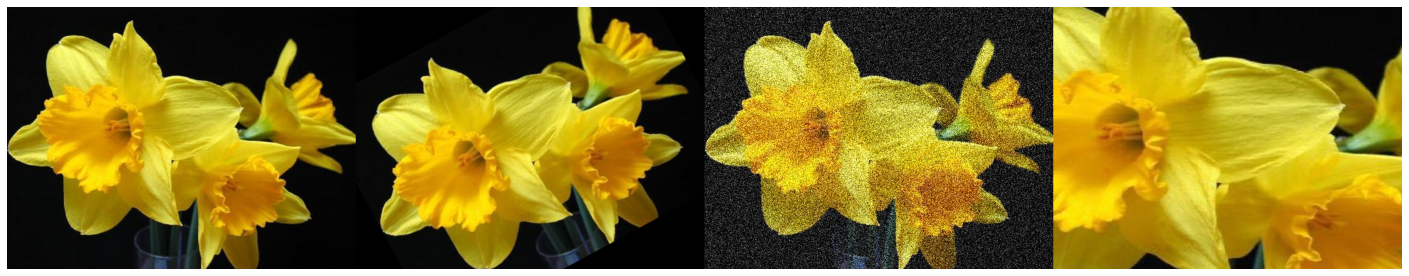

In [ ]:
# get augmented images
image_rotated = rotate.augment_images([image])
image_noise = gaussian_noise.augment_images([image])
image_crop = crop.augment_images([image])
image_hue = hue.augment_images([image])
image_trans = elastic_trans.augment_images([image])
image_flip = flip_vr.augment_images([image])
image_shear = shear.augment_images([image])

##image_coarse = coarse_drop.augment_images([image])

# create an array of augmented images for the demo
images_aug = [image, image_rotated[0], image_noise[0], image_crop[0]]

# plot augmentation examples
plt.figure(figsize=(25,15))
plt.axis('off')
plt.imshow(np.hstack(images_aug))
plt.savefig('data-augmentation_1row.svg',bbox_inches= 'tight', pad_inches  = 0)

#plt.title('Sample augmentations')

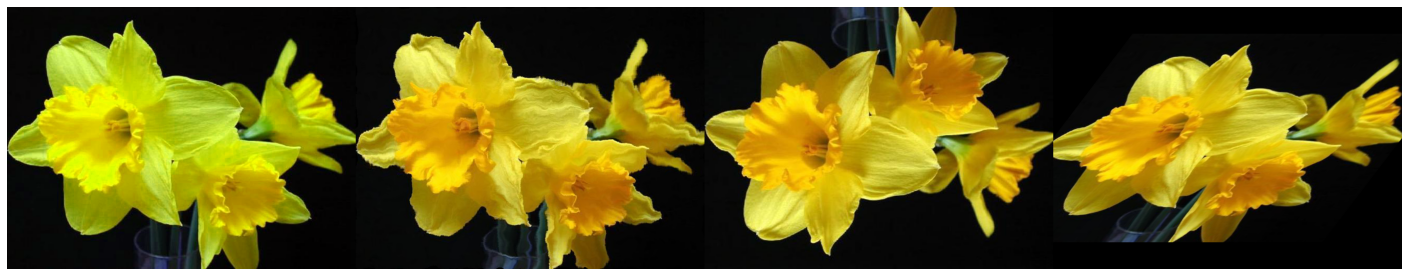

In [ ]:
images_seconde_row = [image_hue[0], image_trans[0],image_flip[0], image_shear[0]]

# plot augmentation examples
plt.figure(figsize=(25,15))
plt.axis('off')
plt.imshow(np.hstack(images_seconde_row))
plt.savefig('data-augmentation_2row.svg',bbox_inches= 'tight', pad_inches  = 0)


In [ ]:


# split data into training and test
from sklearn.model_selection import train_test_split 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state =  104)

input_shape = train_images.shape[1:]
train_images.shape

(399, 224, 224, 3)

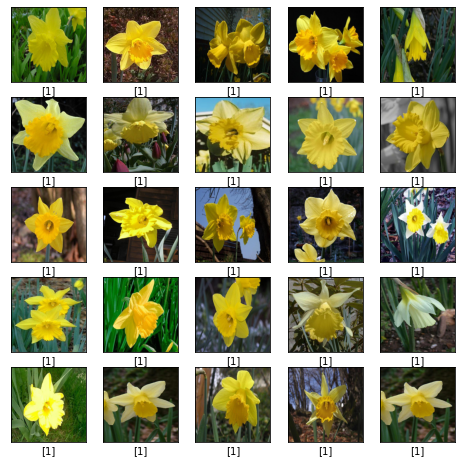

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255, cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [ ]:
# dividing images into train and test folders by creating images from arrays
import cv2
import numpy as np
def create_images(data, labels, folder):
    dirname=folder
    
    if not os.path.exists(dirname): #check if the folder exists; if not make dir
      os.mkdir(dirname)
    n=0
    
    for i in data:
      label_n=labels[n][0]
      subfolder = folder + "/" + str(label_n) 
      if not os.path.exists(subfolder): # create subfolders with categories
          os.mkdir(subfolder)  
      filepath =  subfolder + "/" + str(n)+ ".jpg"
      cv2.imwrite(filepath, data[n]) #save image to corresponding subfolders
      n+=1

In [ ]:
# split data into training and test
from sklearn.model_selection import train_test_split 
X_train, Y_test, x_train, y_test = train_test_split(images, labels, train_size = 0.8, random_state =  104)

print("Train data shape: {}.".format(X_train.shape))
print("Test data shape {}.".format(Y_test.shape))

Train data shape: (39, 224, 224, 3).
Test data shape (10, 224, 224, 3).


In [ ]:
# We have 2 inputs, 1 for each picture
left_input = Input((224,224,3))
right_input = Input((224,224,3))

# We will use 2 instances of 1 network for this task
convnet = Sequential([
    Conv2D(5,3, input_shape=(224,224,3)),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(5,3),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(7,2),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(7,2),
    Activation('relu'),
    Flatten(),
    Dense(18),
    Activation('sigmoid')
])
# Connect each 'leg' of the network to each input
# Remember, they have the same weights
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Getting the L1 Distance between the 2 encodings
L1_layer = Lambda(lambda tensor:K.abs(tensor[0] - tensor[1]))

# Add the distance function to the network
L1_distance = L1_layer([encoded_l, encoded_r])

prediction = Dense(1,activation='sigmoid')(L1_distance)
siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

optimizer = Adam(0.001, decay=2.5e-4)
#//TODO: get layerwise learning rates and momentum annealing scheme described in paperworking
#siamese_net.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
# First let's separate the dataset from 1 matrix to a list of matricies
image_list = np.split(X_train[:500],500)
label_list = np.split(x_train[:500],500)

left_input = []
right_input = []
targets = []

#Number of pairs per image
pairs = 2
#Let's create the new dataset to train on
for i in range(len(label_list)):
    for _ in range(pairs):
        compare_to = i
        while compare_to == i: #Make sure it's not comparing to itself
            compare_to = random.randint(0,499)
        left_input.append(image_list[i])
        right_input.append(image_list[compare_to])
        if label_list[i] == label_list[compare_to]:# They are the same
            targets.append(1.)
        else:# Not the same
            targets.append(0.)
            
left_input = np.squeeze(np.array(left_input))
right_input = np.squeeze(np.array(right_input))
targets = np.squeeze(np.array(targets))

iceimage = X_train[101]
test_left = []
test_right = []
test_targets = []

for i in range(x_train.shape[0]-100):
    test_left.append(iceimage)
    test_right.append(X_train[i+100])
    test_targets.append(x_train[i+100])

test_left = np.squeeze(np.array(test_left))
test_right = np.squeeze(np.array(test_right))
test_targets = np.squeeze(np.array(test_targets))

In [ ]:
x_train.shape[0]-100
test_targets.shape

(699,)

In [ ]:



def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon())) 

# compile the model
#siamese_net.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])
siamese_net.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall(),f1_m])

# fit the model
#siamese_net.summary()
history = siamese_net.fit([left_input,right_input], targets,
          batch_size=10,
          epochs=10,
          verbose=1, validation_split = 0.33,
          validation_data=([test_left,test_right],test_targets))
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

#loss, accuracy, f1_score, precision, recall = siamese_net.evaluate([test_left, test_right],test_targets, verbose=0)
#siamese_net.summary()


Epoch 1/10
67/67 [==============================] - 39s 588ms/step - loss: 0.0968 - accuracy: 0.9552 - precision_3: 1.0000 - recall_3: 0.3750 - f1_m: 0.2085 - val_loss: 0.2501 - val_accuracy: 0.9335 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/10
67/67 [==============================] - 39s 579ms/step - loss: 0.0842 - accuracy: 0.9671 - precision_3: 1.0000 - recall_3: 0.5417 - f1_m: 0.3085 - val_loss: 0.2540 - val_accuracy: 0.9305 - val_precision_3: 0.3333 - val_recall_3: 0.0455 - val_f1_m: 0.0196
Epoch 3/10
67/67 [==============================] - 39s 583ms/step - loss: 0.0764 - accuracy: 0.9716 - precision_3: 1.0000 - recall_3: 0.6042 - f1_m: 0.3527 - val_loss: 0.2610 - val_accuracy: 0.9335 - val_precision_3: 0.5000 - val_recall_3: 0.0909 - val_f1_m: 0.0392
Epoch 4/10
67/67 [==============================] - 41s 614ms/step - loss: 0.0667 - accuracy: 0.9821 - precision_3: 1.0000 - recall_3: 0.7500 - f1_m: 0.3930 - val_loss: 0.2588 - val_accur

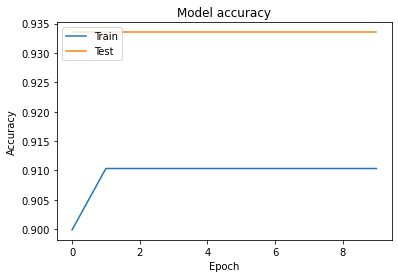

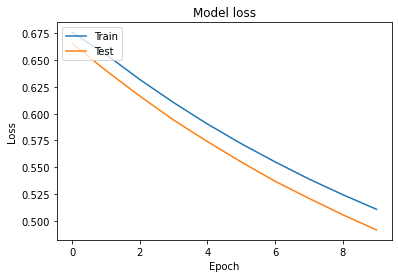

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('model-accuracy:siamese-flowerdata.svg', bbox_inches = 'tight',pad_inches = 0)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('model-loss:siameses-flowerdata.svg', bbox_inches = 'tight',pad_inches = 0)
plt.show()

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X = test_targets.reshape(list(test_targets.shape) + [1])    # (60000, 28, 28, 1)
X.shape
type(test_targets)

numpy.ndarray

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1-score = 2*((precision * recall)/ precision + recall+ k.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
    factual = K.epsilon()*recall/precision
# compile the model
siamese_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
#siamese_net.summary()
history = siamese_net.fit([left_input,right_input], targets,
          batch_size=10,
          epochs=10,
          verbose=1, validation_split = 0.33,
          validation_data=([test_left,test_right],test_targets))
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

loss, accuracy, f1_score, precision, recall = siamese_net.evaluate([test_left, test_right],test_targets, verbose=0)

TypeError: ignored

***implementation imagewoof imageneette***

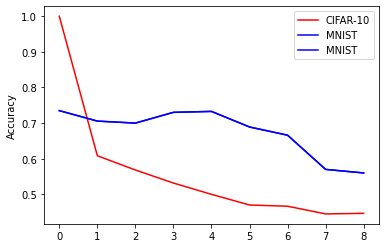

**k-fold**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
(input_train, target_train), (input_test, target_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(input_train, target_train, train_size = 0.8, random_state =  104)


In [ ]:

# Determine shape of the data
input_shape = (train_images.shape[1], train_images.shape[2])
input_shape

(28, 28)

In [ ]:
# Parse numbers as floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize data
train_images = train_images / 255
test_images = test_images / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((train_images, test_images), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)

In [ ]:
# Model configuration
batch_size = 5
#img_width, img_height, img_num_channels = 28, 28, 1
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100
optimizer = Adam()
verbosity = 1
num_folds = 10

In [ ]:
 inputs = inputs.reshape(-1, 28, 28,1)
inputs.shape

(60000, 28, 28, 1)

In [ ]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential([
    Conv2D(5,3, input_shape=(28,28,1)),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(5,3),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(7,2),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(7,2),
    Activation('relu'),
    Flatten(),
    Dense(18),
    Activation('sigmoid')
  ])
  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
10800/10800 [==============================] - 43s 4ms/step - loss: 1.0952 - accuracy: 0.6307
Epoch 2/100
10800/10800 [==============================] - 42s 4ms/step - loss: 0.3997 - accuracy: 0.8784
Epoch 3/100
10800/10800 [==============================] - 43s 4ms/step - loss: 0.2862 - accuracy: 0.9109
Epoch 4/100
10800/10800 [==============================] - 43s 4ms/step - loss: 0.1930 - accuracy: 0.9416
Epoch 5/100
10800/10800 [==============================] - 44s 4ms/step - loss: 0.1573 - accuracy: 0.9517
Epoch 6/100
10800/10800 [==============================] - 44s 4ms/step - loss: 0.1380 - accuracy: 0.9577
Epoch 7/100
10800/10800 [==============================] - 43s 4ms/step - loss: 0.1253 - accuracy: 0.9610
Epoch 8/100
10800/10800 [==============================] - 44s 4ms/step - loss: 0.1177 - accuracy: 0.9631
Epoch 9/100
10800/10800 [==============================

In [ ]:
#https://github.com/luisra/flowers17/blob/master/flowers17.ipynb
#https://www.kaggle.com/saidakbarp/17-flower-categories-cnn